In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
np.ones((3, 3)) / 9

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [5]:
def my_average_filter_3x3(src):
    mask = np.ones((3, 3)) / 9
    print(mask)

    # (입력이미지, 리턴타입, 필터)
    dst = cv2.filter2D(src, -1, mask)

    return dst

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


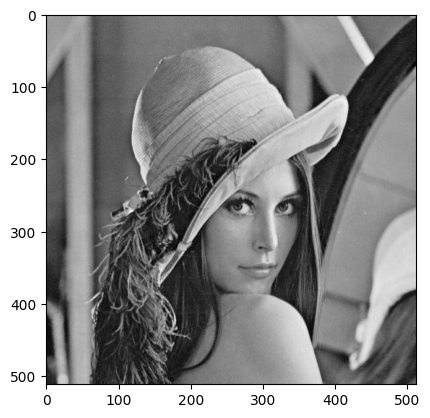

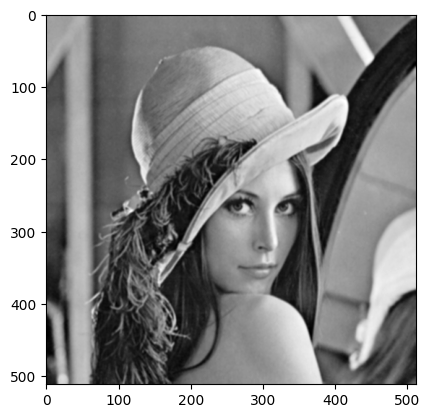

In [16]:
src = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
dst = my_average_filter_3x3(src)
plt.imshow(src, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

In [12]:
def my_sharpening_filter_3x3(src):
    zeros = np.zeros((3, 3))
    zeros[1, 1] = 2
    mask = zeros - (np.ones((3, 3)) / 9)
    print(mask)

    # (입력이미지, 리턴타입, 필터)
    dst = cv2.filter2D(src, -1, mask)

    return dst

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


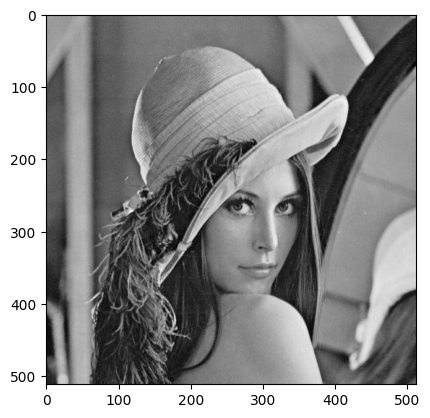

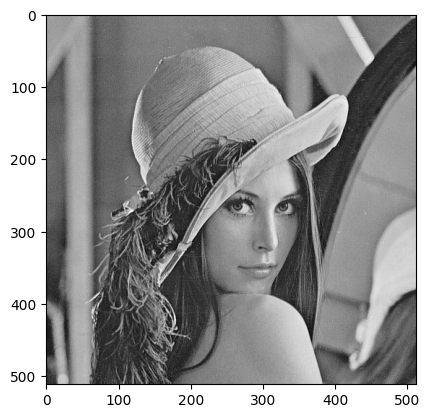

In [15]:
src = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
dst = my_sharpening_filter_3x3(src)
plt.imshow(src, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

In [18]:
def my_zero_padding(src, pad_shape):
    (h, w) = src.shape
    (p_h, p_w) = pad_shape
    pad_img = np.zeros((h+2*p_h, w+2*p_w))
    pad_img[p_h:p_h+h, p_w:p_w+w] = src
    return pad_img

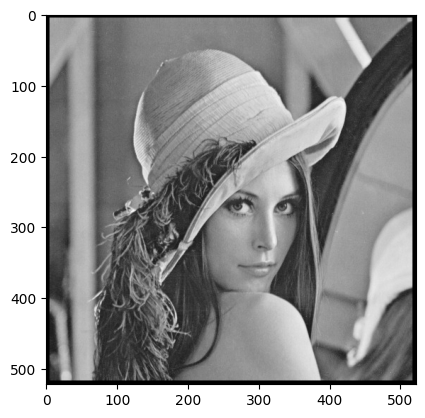

In [20]:
src = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
pad_img = my_zero_padding(src, (5, 5))
plt.imshow(pad_img, cmap='gray')
plt.show()

In [21]:
def my_filtering(src, mask):
    #########################################################
    # TODO                                                  #
    # dst 완성                                              #
    # dst : filtering 결과 image                            #
    #########################################################
    h, w = src.shape
    m_h, m_w = mask.shape
    # (m_h, m_w)의 filter 사용 시 m_h//2, m_w//2 만큼 padding이 필요함
    pad_img = my_zero_padding(src, (m_h//2, m_w//2))
    dst = np.zeros((h, w))
    
    """
    반복문을 이용하여 filtering을 완성하기
    """
    for row in range(h):
        for col in range(w):
            val = (pad_img[row: row+m_h, col: col+m_w] * mask).sum()
            val = np.clip(val, 0, 255) #범위를 0~255로 조정
            dst[row, col] = val

    dst = (dst+0.5).astype(np.uint8) #uint8의 형태로 조정

    return dst

In [74]:
h, w = 3, 3
y, x = np.mgrid[-(h//2): h//2+1, -(w//2): w//2+1]
y, x

(array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]),
 array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]))

In [70]:
y, x = np.mgrid[-1:2, -1:2]
y, x

(array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]),
 array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]))

In [60]:
def my_get_Gaussian2D_mask(msize, sigma=1):
    #########################################
    # ToDo
    # 2D gaussian filter 만들기
    #########################################
    (h, w) = msize
    y, x = np.mgrid[-(h//2): h//2+1, -(w//2): w//2+1]
    '''
    y, x = np.mgrid[-1:2, -1:2]
    y = [[-1,-1,-1],
         [ 0, 0, 0],
         [ 1, 1, 1]]
    x = [[-1, 0, 1],
         [-1, 0, 1],
         [-1, 0, 1]]
    '''
    # 파이 => np.pi 를 쓰시면 됩니다.
    # 2차 gaussian mask 생성
    gaus2D = (1 / (2*np.pi*(sigma ** 2))) * np.exp(-((x**2 + y**2)/(2*(sigma**2))))
    # mask의 총 합 = 1
    gaus2D /= gaus2D.sum()

    return gaus2D

In [68]:
(1/(2*np.pi)) * np.exp(-4)

0.0029150244650281935

In [63]:
msize = (5, 5)
my_get_Gaussian2D_mask(msize)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [ ]:
def my_get_Gaussian1D_mask(msize, sigma=1):
    #########################################
    # ToDo
    # 1D gaussian filter 만들기
    #########################################
    x = np.full((1, msize), [range(-(msize // 2), (msize // 2) + 1)])
    '''
    x = np.full((1, 3), [-1, 0, 1])
    x = [[ -1, 0, 1]]

    x = np.array([[-1, 0, 1]])
    x = [[ -1, 0, 1]]
    '''

    # 파이 => np.pi 를 쓰시면 됩니다.
    gaus1D = ???

    # mask의 총 합 = 1
    gaus1D /= ???
    return gaus1D

In [ ]:
def my_mask(ftype, fshape, sigma=1):
    if ftype == 'average':
        print('average filtering')
        ###################################################
        # TODO                                            #
        # mask 완성                                       #
        ###################################################
        mask = ???
        mask = ???

        #mask 확인
        print(mask)

    elif ftype == 'sharpening':
        print('sharpening filtering')
        ##################################################
        # TODO                                           #
        # mask 완성                                      #
        ##################################################

        base_mask = np.zeros(fshape)
        base_mask[fshape[0]//2, fshape[1]//2] = 2
        aver_mask = ???
        aver_mask = ???
        mask = ???

        #mask 확인
        print(mask)

    elif ftype == 'gaussian2D':
        print('gaussian filtering')
        ##################################################
        # TODO                                           #
        # mask 완성                                      #
        ##################################################
        mask = my_get_Gaussian2D_mask(fshape, sigma=sigma)
        #mask 확인
        print(mask)

    elif ftype == 'gaussian1D':
        print('gaussian filtering')
        ##################################################
        # TODO                                           #
        # mask 완성                                      #
        ##################################################
        mask = my_get_Gaussian1D_mask(fshape, sigma=sigma)
        #mask 확인
        print(mask)

    return mask

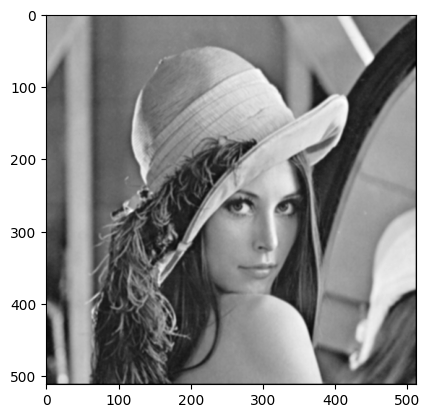

(162, 161, 161, 161, 72)

In [28]:
src = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
mask = np.ones((3, 3)) / 9
filter_img = my_filtering(src, mask)
plt.imshow(filter_img, cmap='gray')
plt.show()

src[0, 0], src[0, 1], src[1, 0], src[1, 1], filter_img[0, 0]

In [29]:
(162 + 161 + 161 + 161) / 9

71.66666666666667

In [ ]:
def my_get_Gaussian2D_mask(msize, sigma=1):
    #########################################
    # ToDo
    # 2D gaussian filter 만들기
    #########################################
    y, x = np.mgrid[???:???, ???:???]
    '''
    y, x = np.mgrid[-1:2, -1:2]
    y = [[-1,-1,-1],
         [ 0, 0, 0],
         [ 1, 1, 1]]
    x = [[-1, 0, 1],
         [-1, 0, 1],
         [-1, 0, 1]]
    '''
    # 파이 => np.pi 를 쓰시면 됩니다.
    # 2차 gaussian mask 생성
    gaus2D = ???
    # mask의 총 합 = 1
    gaus2D /= ???

    return gaus2D